## Wine

The data set we will be using for this project has several attributes or chemical components that make up wines. Each of these attributes contribute to either the taste of the wines or the price, which may determine the number of cases these wines are sold.

Attributes that impact taste of wine (following definitions sourced from the internet):

* Fixed Acidity: Fixed acidity corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids and is inherent to the characteristics of the sample

* Volatile Acidity: volatile acidity corresponds to the set of short chain organic acids that can be extracted from the sample by means of a distillation process

* Citric Acid: Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It complements specific sugar

* Residual Sugar: Residual Sugar (or RS) is from natural grape sugars leftover in a wine after the alcoholic fermentation finishes. It’s measured in grams per liter

* Chlorides: Impact the taste, as it bring major contribution to saltiness in wine taste

* pH: If the pH is higher, the wine will be softer and rounder, and if the pH is lower, it will feel more linear

* Sulphates: While many wine producers agree that very high amounts can alter the taste and color, low amounts actually preserve the flavors




### Uploading data

In [165]:
# bunch of import statememts that are going to be used throught the project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
# uploading data to pandas

df = pd.read_csv('https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv', header=None)

#prints few lines of the sample table including the deader 
df.head()
# print(df.shape)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
1,1,3,3.2,1.16,-0.98,54.2,-0.567,NaN,268,0.9928,3.33,-0.59,9.9,0,8,2
2,2,3,4.5,0.16,-0.81,26.1,-0.425,15,-327,1.02792,3.38,0.7,NaN,-1,7,3
3,4,5,7.1,2.64,-0.88,14.8,0.037,214,142,0.99518,3.12,0.48,22,-1,8,3
4,5,3,5.7,0.385,0.04,18.8,-0.425,22,115,0.9964,2.24,1.83,6.2,-1,6,1


### Assigning column names 

In [167]:
#drop the first row which contains all the column names
# as we are assigning them as a column
new_df = df.drop(0)

# assigning column names

new_df.columns = ['Unique ID', 'Num Cases', 'Fixed Acidity',  'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohal Content', 'Label Appeal', 'Total Acidity', 'STARS']

# print size of the data set
print(new_df.shape)

# print head again to see if column names are properly applied
new_df.head()

(12795, 16)


,Unique ID,Num Cases,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohal Content,Label Appeal,Total Acidity,STARS
1,1,3,3.2,1.16,-0.98,54.2,-0.567,NaN,268,0.9928,3.33,-0.59,9.9,0,8,2
2,2,3,4.5,0.16,-0.81,26.1,-0.425,15,-327,1.02792,3.38,0.7,NaN,-1,7,3
3,4,5,7.1,2.64,-0.88,14.8,0.037,214,142,0.99518,3.12,0.48,22,-1,8,3
4,5,3,5.7,0.385,0.04,18.8,-0.425,22,115,0.9964,2.24,1.83,6.2,-1,6,1
5,6,4,8,0.33,-1.26,9.4,NaN,-167,108,0.99457,3.12,1.77,13.7,0,9,2


### 3. Using your Python skills, perform exploratory data analysis (EDA) on all of the provided data attributes and document your findings. Your EDA writeup should include any insights you are able to derive from your statistical analysis of the attributes and the accompanying exploratory graphics you create (e.g., bar plots, box plots, histograms, line plots, etc.). It is up to you as the data science practitioner to decide how you go about your EDA, including selecting appropriate statistical metrics to be calculated which types of exploratory graphics to make use of. You should also identify any and all potential data integrity issues (e.g., missing data values; invalid data values; etc.) 

### Exploratory Data Analytics (EDA)

Running a general statistics for the given data. This data consists of 12795 rows and 16 different columns. All of these attributes are assigned as object data type. It appears as though, the dats types needs changes as all of them may not be objects. Because all of these attributes are listed as objects, non of the mathematical operations are calculated such as mean, standard deviation and the percentiles (25%, 50% Median, and 75%). From the initial glance into the general stat table, it appears that there is a need for a lot of data cleaning. 

There are a lot of variables in this data set. And most of these variables contribute to the taste of wine. Better testing wines are assumed to have sold more and have better "STAR" ratings, which is why the analysis will focus on the quantity sold, and their ratings associating them with the quality or taste of wine. 

In [168]:
new_df.describe()

,Unique ID,Num Cases,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohal Content,Label Appeal,Total Acidity,STARS
count,12795,12795,12795,12795,12795,12179,12157,12148,12113,12795,12400,11585,12142,12795,12795,9436
unique,12795,9,470,815,602,2077,1663,999,1370,5933,497,630,401,5,14,4
top,1,4,6.8,0.24,0.3,1.4,0.044,29,125,0.9976,3.22,0.5,9.4,0,7,2
freq,1,3177,378,286,342,218,179,167,65,65,198,225,345,5617,4878,3570


In [169]:
#generate informations on data set
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 1 to 12795
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique ID             12795 non-null  object
 1   Num Cases             12795 non-null  object
 2   Fixed Acidity         12795 non-null  object
 3   Volatile Acidity      12795 non-null  object
 4   Citric Acid           12795 non-null  object
 5   Residual Sugar        12179 non-null  object
 6   Chlorides             12157 non-null  object
 7   Sulfur Dioxide        12148 non-null  object
 8   Total Sulfur Dioxide  12113 non-null  object
 9   Density               12795 non-null  object
 10  pH                    12400 non-null  object
 11  Sulphates             11585 non-null  object
 12  Alcohal Content       12142 non-null  object
 13  Label Appeal          12795 non-null  object
 14  Total Acidity         12795 non-null  object
 15  STARS                 9436 non-null 

In [170]:
#gets minimum value for all attributes

new_df.min() 

C:\Users\User\AppData\Local\Temp\ipykernel_20000\3247226091.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.min()


Unique ID                 1
Num Cases                 0
Fixed Acidity          -0.1
Volatile Acidity      -0.01
Citric Acid           -0.01
Density             0.88809
Label Appeal             -1
Total Acidity            10
dtype: object

### Change Data Type

Some of the most obvious data that should be integers are transformed into numeric. 

In [172]:
# converting the columns into numeric

new_df['Residual Sugar'] = pd.to_numeric(new_df['Residual Sugar'])

new_df['Num Cases'] = pd.to_numeric(new_df['Num Cases'])

new_df['Fixed Acidity'] = pd.to_numeric(new_df['Fixed Acidity'])

new_df['Density'] = pd.to_numeric(new_df['Density'])

new_df['Volatile Acidity'] = pd.to_numeric(new_df['Volatile Acidity'])

new_df['Label Appeal'] = pd.to_numeric(new_df['Label Appeal'])

new_df['Citric Acid'] = pd.to_numeric(new_df['Citric Acid'])

new_df['Density'] = pd.to_numeric(new_df['Density'])




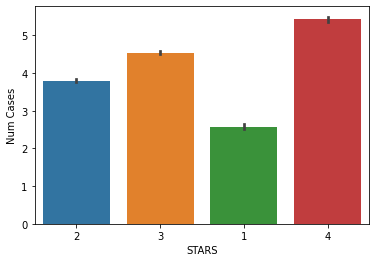

In [173]:
sns.barplot(x = 'STARS', y = 'Num Cases', data = new_df)
plt.show()


It appears that the highest rated wines are sold the most. 

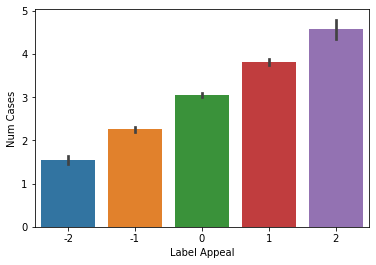

In [174]:
sns.barplot(x = 'Label Appeal', y = 'Num Cases', data = new_df)
plt.show()

It shows that the marketing of wines and their bottle appearence impacts the sales of those wines. 

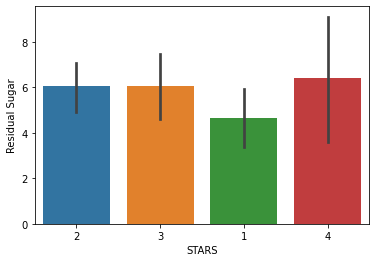

In [175]:
sns.barplot(x = 'STARS', y = 'Residual Sugar', data = new_df)
plt.show()

Sugar level on wines seems to have not much impact on their ratings. 

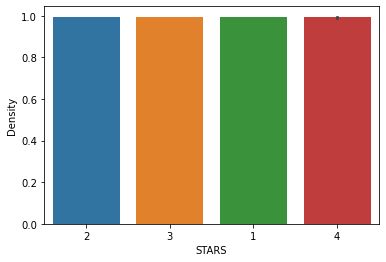

In [176]:
sns.barplot(x = 'STARS', y = 'Density', data = new_df)
plt.show()

Based on the bar plot above, the ratings of the wines have nothing to do with the wines density. 

### Box Plot:

<AxesSubplot:>

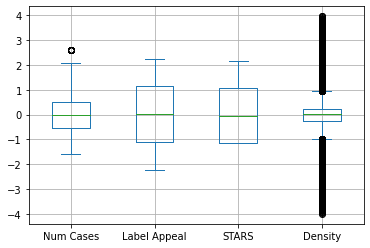

In [177]:
# for Numeric Data, box plot
# 

numericDataColumns = ['Num Cases', 'Label Appeal', 'STARS','Density']
vals = new_df[numericDataColumns].copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
vals_scaled = scaler.fit_transform(vals)
vals_scaled = pd.DataFrame(vals_scaled, columns=numericDataColumns)

vals_scaled.plot.box(grid='True')

<AxesSubplot:title={'center':'Num Cases'}, xlabel='Label Appeal'>

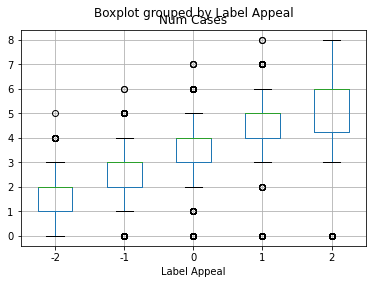

In [178]:
#Using both Matplolib and Seaborn, make boxplots of the diamond price for each distinct cut value and
#discuss any conclusions you can draw from the appearance of the boxplots.

new_df.boxplot(column="Num Cases", by= "Label Appeal")



<AxesSubplot:xlabel='STARS', ylabel='Num Cases'>

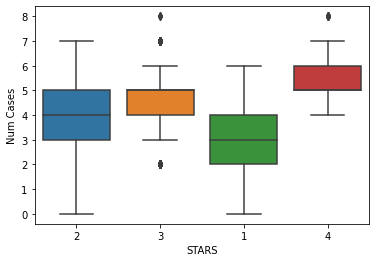

In [179]:
#doing the same as above in seaborn
sns.boxplot(y ='Num Cases', x ='STARS',data = new_df )

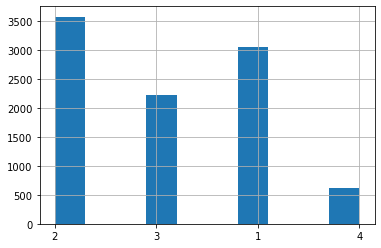

In [180]:
new_df['STARS'].hist()
plt.show()

<AxesSubplot:xlabel='STARS', ylabel='Count'>

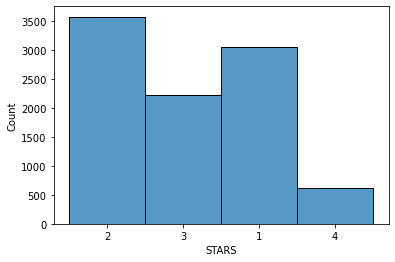

In [181]:
sns.histplot(new_df['STARS'])

Two star wines are sold the most. If we had price data, we could compare and see if pricing of higher rating wines played role in volume sold.

### Check for null values: 

In [183]:
# checking for null values

new_df.columns[new_df.isnull().any()]

# new_df.isnull.sum()

Index(['Residual Sugar', 'Chlorides', 'Sulfur Dioxide', 'Total Sulfur Dioxide',
       'pH', 'Sulphates', 'Alcohal Content', 'STARS'],
      dtype='object')

There are a lot of attributes that contains null values. Before we decide what to do with NaN values, it is important to find out how many such values are there in each of those column. 

In [184]:
# how many 'NaN' values are in the ___________ column?

new_df['Residual Sugar'].isna().sum()

616

In [185]:
# how many 'NaN' values are in the ___________ column?

new_df['Chlorides'].isna().sum()

638

In [186]:
# how many 'NaN' values are in the ___________ column?

new_df['Sulfur Dioxide'].isna().sum()


647

In [187]:
# how many 'NaN' values are in the ___________ column?

new_df['Total Sulfur Dioxide'].isna().sum()


682

In [188]:
# how many 'NaN' values are in the ___________ column?

new_df['pH'].isna().sum()

395

In [189]:
# how many 'NaN' values are in the ___________ column?

new_df.Sulphates.isna().sum()


1210

In [190]:
# how many 'NaN' values are in the ___________ column?

new_df['Alcohal Content'].isna().sum()

653

In [191]:
# how many 'NaN' values are in the ___________ column?

new_df['STARS'].isna().sum()

3359

### 4. Using your Python skills, perform appropriate data preparation tasks relative to the data integrity + usability issues you identified via your EDA work. Describe the ways in which you have transformed / prepared the data for use within a machine learning algorithm, e.g., have you deleted any observations? Used imputation to fill missing data values? Created any new variables? Transformed data via mathematical transforms (e.g., Box-Cox, logarithms, etc.) or binning? etc. Be sure to explain your justification for each adjustment you have made to the data. 

### Dealing with NaNs 

EDA has shown that there are a lot of null values in those attributes. We have to get rid of those values using any one of our imputation technique.

STARS has the highest number of NaN values. There are few options such as to replace the STARS with some fixed value, or to assign some values before or after that rows. We could also assign some mean, or median values. However, STAR is a very sensitive attribute, replacing STAR with any random value will mislead the analytics. So, it is better to remove all the NaN values in STAR column. 

The columns that have more than 5% missing variables are going to be dropped. 

For the rest of the attributes, we can assign median values.

In [192]:
thres_df = new_df.copy()
thres_df.head()


,Unique ID,Num Cases,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohal Content,Label Appeal,Total Acidity,STARS
1,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268,0.99280,3.33,-0.59,9.9,0,8,2
2,2,3,4.5,0.160,-0.81,26.1,-0.425,15,-327,1.02792,3.38,0.7,NaN,-1,7,3
3,4,5,7.1,2.640,-0.88,14.8,0.037,214,142,0.99518,3.12,0.48,22,-1,8,3
4,5,3,5.7,0.385,0.04,18.8,-0.425,22,115,0.99640,2.24,1.83,6.2,-1,6,1
5,6,4,8.0,0.330,-1.26,9.4,NaN,-167,108,0.99457,3.12,1.77,13.7,0,9,2


In [193]:
# convert the columns into numeric

thres_df = thres_df.apply (pd.to_numeric, errors='coerce')

In [194]:
# taking only the rows where STARS is not NaN

thres_df = thres_df[thres_df['STARS'].notna()]

print(thres_df)


       Unique ID  Num Cases  Fixed Acidity  Volatile Acidity  Citric Acid  \
1              1          3            3.2             1.160        -0.98   
2              2          3            4.5             0.160        -0.81   
3              4          5            7.1             2.640        -0.88   
4              5          3            5.7             0.385         0.04   
5              6          4            8.0             0.330        -1.26   
...          ...        ...            ...               ...          ...   
12790      16119          4            4.4             0.220         0.29   
12792      16123          5            8.9             0.470         0.29   
12793      16127          4            6.0             0.170        -1.10   
12794      16128          3            7.7             0.320         0.12   
12795      16129          4            5.2            -0.040        -0.81   

       Residual Sugar  Chlorides  Sulfur Dioxide  Total Sulfur Dioxide  \
1

We have just taken the data that have numeric values and assigned them to our data frame dropped_df. 

In [195]:
# how many 'NaN' values are in the ___________ column?

thres_df['STARS'].isna().sum()

0

Now drop attributes that have more than 5% missing datas. 

In [196]:
# make copy

new1_df = thres_df.copy()


In [197]:
# drop the column with more than 5% NaN values

new1_df.dropna(thresh = int(new1_df.shape[0]*0.95), axis = 1, inplace = True)
print(new1_df)

       Unique ID  Num Cases  Fixed Acidity  Volatile Acidity  Citric Acid  \
1              1          3            3.2             1.160        -0.98   
2              2          3            4.5             0.160        -0.81   
3              4          5            7.1             2.640        -0.88   
4              5          3            5.7             0.385         0.04   
5              6          4            8.0             0.330        -1.26   
...          ...        ...            ...               ...          ...   
12790      16119          4            4.4             0.220         0.29   
12792      16123          5            8.9             0.470         0.29   
12793      16127          4            6.0             0.170        -1.10   
12794      16128          3            7.7             0.320         0.12   
12795      16129          4            5.2            -0.040        -0.81   

       Residual Sugar  Chlorides  Sulfur Dioxide  Density    pH  Label Appe

Replace remaning NaN values with the median values. 

In [198]:
new1_df = new1_df.fillna(df.median())

C:\Users\User\AppData\Local\Temp\ipykernel_20000\510388831.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new1_df = new1_df.fillna(df.median())


In [146]:
new_df['Residual Sugar']

1        54.2
2        26.1
3        14.8
4        18.8
5         9.4
         ... 
12790     1.9
12792    84.9
12793    37.0
12794     NaN
12795    52.7
Name: Residual Sugar, Length: 9436, dtype: float64

In [199]:
# filling NaN values with median value

new1_df['Residual Sugar'] = new1_df['Residual Sugar'].fillna(new1_df['Residual Sugar'].median())

new1_df['Chlorides'] = new1_df['Chlorides'].fillna(new1_df['Chlorides'].median())

new1_df['Sulfur Dioxide'] = new1_df['Sulfur Dioxide'].fillna(new1_df['Sulfur Dioxide'].median())

new1_df['pH'] = new1_df['pH'].fillna(new1_df['pH'].median())




In [200]:
# checking for null values

new1_df.columns[new1_df.isnull().any()]

Index([], dtype='object')

In [201]:
new1_df.describe()

,Unique ID,Num Cases,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Sulfur Dioxide,Density,pH,Label Appeal,Total Acidity,STARS
count,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000
mean,8036.988872,3.685990,6.917820,0.297506,0.313923,5.577914,0.049088,33.489879,0.993862,3.202159,0.046948,7.639360,2.041755
std,4625.591814,1.552357,6.281915,0.780265,0.861098,32.837441,0.308310,145.328062,0.026547,0.666873,0.877451,1.178852,0.902540
min,1.000000,0.000000,-18.100000,-2.750000,-3.160000,-127.800000,-1.171000,-555.000000,0.888090,0.480000,-2.000000,4.000000,1.000000
25%,4040.500000,3.000000,5.100000,0.110000,0.050000,0.900000,-0.004000,6.000000,0.987138,2.970000,-1.000000,7.000000,1.000000
50%,8030.000000,4.000000,6.900000,0.270000,0.310000,4.600000,0.044000,32.000000,0.994100,3.190000,0.000000,7.000000,2.000000
75%,12020.250000,5.000000,9.200000,0.600000,0.580000,15.000000,0.118250,68.000000,1.000337,3.440000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,32.500000,3.680000,3.770000,141.150000,1.270000,622.000000,1.099240,6.050000,2.000000,17.000000,4.000000


Now that we have prepared our data for machine learning algorithms, this data now makes more sense than it did in the beginning. 

We have 13 columns out of 16 in total previously. 



### Applying PCA to further narrow down our data. 

In [202]:
new2_df = new1_df.copy()

In [203]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

# drop the column we will be looking for 
pca_test = new2_df.drop('STARS', 1)

#normalize data
new2_df = pd.DataFrame(preprocessing.scale(pca_test), columns=pca_test.columns)

# do PCA
pca = PCA(n_components=len(new2_df.columns))
x_new = pca.fit_transform(new2_df)
x_new = pd.DataFrame(x_new)

C:\Users\User\AppData\Local\Temp\ipykernel_20000\3774476353.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pca_test = new2_df.drop('STARS', 1)


In [204]:
print(x_new)

            0         1         2         3         4         5         6   \
0     0.487477 -0.860459  0.707313  2.223757 -0.706142  0.100000  0.999048   
1     1.021581 -1.376493  0.672606  1.637598 -0.520320  1.497042 -0.030858   
2     0.697475 -0.219152  1.861341  1.511398  0.021959  0.448646  2.094347   
3     0.866329 -1.215525 -0.338678  0.347458 -0.621025  1.299650  0.571090   
4     0.368744  0.268235  1.857576  0.287559 -1.176064  0.214327 -0.226064   
...        ...       ...       ...       ...       ...       ...       ...   
9431 -0.132573  0.011758  0.321783 -0.995814  1.260042 -0.941229 -0.412717   
9432  0.074318 -0.510953 -0.051712  1.655582  1.567713 -2.343693 -1.004226   
9433 -0.587057 -1.500101  0.316508  0.009863  1.650224 -1.002118  0.491208   
9434  0.618041 -1.495197 -0.505790  0.099043  0.622241 -0.916685  0.367179   
9435 -0.446693 -1.280061  0.425489  0.518845  0.993088 -1.746309 -0.411749   

            7         8         9         10        11  
0     

In [205]:
print("Explain Variance: ", pca.explained_variance_ratio_)

Explain Variance:  [0.12975129 0.09827424 0.08732952 0.08565751 0.08462495 0.08325197
 0.0821425  0.08119829 0.08035199 0.08005811 0.0695765  0.03778312]


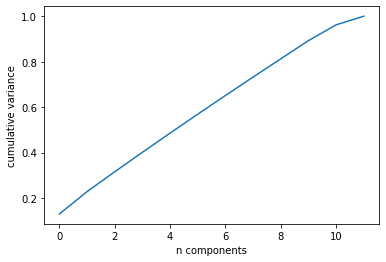

In [210]:
plt.figure(figsize=(6, 4))

#plot the variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

We can see that almost 9 components explain the 90% of the data. 

### PDA Again

In [211]:
pca = PCA(n_components=5)
# choose the same set of data, with reduced components
x_new = pca.fit_transform(new2_df)
x_new = pd.DataFrame(x_new)

In [212]:
print(x_new)

             0         1         2         3         4
0     0.487477 -0.860459  0.707313  2.223757 -0.706142
1     1.021581 -1.376493  0.672606  1.637598 -0.520320
2     0.697475 -0.219152  1.861341  1.511398  0.021959
3     0.866329 -1.215525 -0.338678  0.347458 -0.621025
4     0.368744  0.268235  1.857576  0.287559 -1.176064
...        ...       ...       ...       ...       ...
9431 -0.132573  0.011758  0.321783 -0.995814  1.260042
9432  0.074318 -0.510953 -0.051712  1.655582  1.567713
9433 -0.587057 -1.500101  0.316508  0.009863  1.650224
9434  0.618041 -1.495197 -0.505790  0.099043  0.622241
9435 -0.446693 -1.280061  0.425489  0.518845  0.993088

[9436 rows x 5 columns]


In [213]:
print("Explain Variance: ", pca.explained_variance_ratio_)

Explain Variance:  [0.12975129 0.09827424 0.08732952 0.08565751 0.08462495]


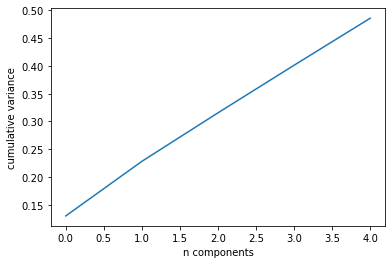

In [216]:
plt.figure(figsize=(6, 4))

#plot the variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

The variance is highly removed in this data. The distribution is now highly balanced.

### 5 - Using Python, re-run your EDA analysis on any variables you have adjusted during Data Preparation and compare / contrast your results to those you saw prior to performing your Data Preparation adjustments. Describe how each of your Data Preparation adjustments have improved the data set for purposes of using it within a machine learning algorithm. 

### Re-running EDA

In [218]:
new1_df.describe()

,Unique ID,Num Cases,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Sulfur Dioxide,Density,pH,Label Appeal,Total Acidity,STARS
count,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000
mean,8036.988872,3.685990,6.917820,0.297506,0.313923,5.577914,0.049088,33.489879,0.993862,3.202159,0.046948,7.639360,2.041755
std,4625.591814,1.552357,6.281915,0.780265,0.861098,32.837441,0.308310,145.328062,0.026547,0.666873,0.877451,1.178852,0.902540
min,1.000000,0.000000,-18.100000,-2.750000,-3.160000,-127.800000,-1.171000,-555.000000,0.888090,0.480000,-2.000000,4.000000,1.000000
25%,4040.500000,3.000000,5.100000,0.110000,0.050000,0.900000,-0.004000,6.000000,0.987138,2.970000,-1.000000,7.000000,1.000000
50%,8030.000000,4.000000,6.900000,0.270000,0.310000,4.600000,0.044000,32.000000,0.994100,3.190000,0.000000,7.000000,2.000000
75%,12020.250000,5.000000,9.200000,0.600000,0.580000,15.000000,0.118250,68.000000,1.000337,3.440000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,32.500000,3.680000,3.770000,141.150000,1.270000,622.000000,1.099240,6.050000,2.000000,17.000000,4.000000


### Before: 

Stars vs Number of Cases

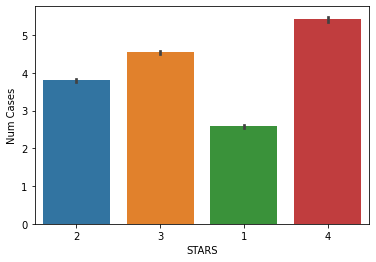

In [220]:
sns.barplot(x = 'STARS', y = 'Num Cases', data = new_df)
plt.show()

### After

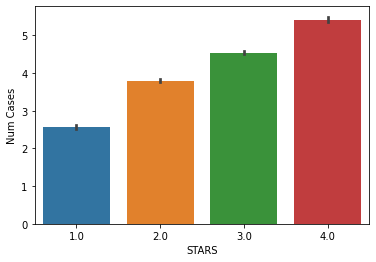

In [219]:
sns.barplot(x = 'STARS', y = 'Num Cases', data = new1_df)
plt.show()

The data set suggests that the higher rated "STARS" wines are sold more. Which is slightly different than what we had before

### Before:

Lebel Appeal vs Number of Cases

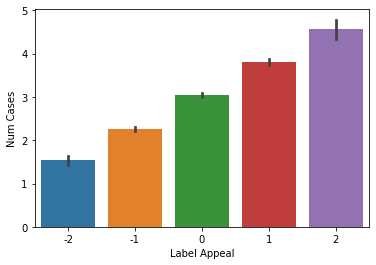

In [221]:
sns.barplot(x = 'Label Appeal', y = 'Num Cases', data = new_df)
plt.show()

### After:

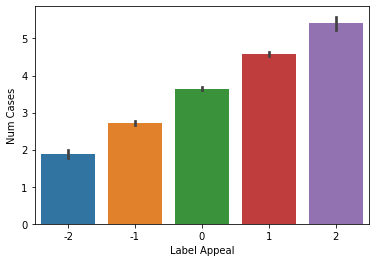

In [222]:
sns.barplot(x = 'Label Appeal', y = 'Num Cases', data = new1_df)
plt.show()

There has not been much change in lebel appeal vs number of cases. Each time the number of cases sold are higher with more appealing lebel.

### Before:

STARS vs Resigual Sugar

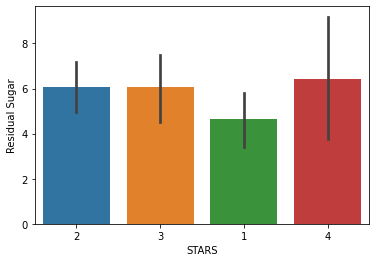

In [223]:
sns.barplot(x = 'STARS', y = 'Residual Sugar', data = new_df)
plt.show()

### After:

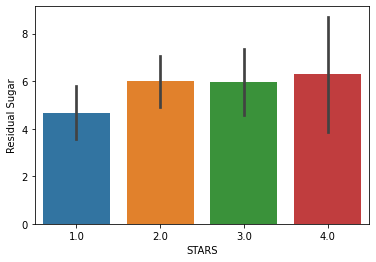

In [224]:
sns.barplot(x = 'STARS', y = 'Residual Sugar', data = new1_df)
plt.show()

Slight change in sistribution, with the higher STAR, there is more sugar content of sugar in wine. 

### Before:
 
STARS vs Number of Cases

<AxesSubplot:xlabel='STARS', ylabel='Num Cases'>

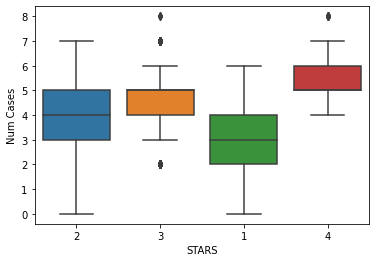

In [227]:
#doing the same as above in seaborn
sns.boxplot(y ='Num Cases', x ='STARS',data = new_df )

### After: 

<AxesSubplot:xlabel='STARS', ylabel='Num Cases'>

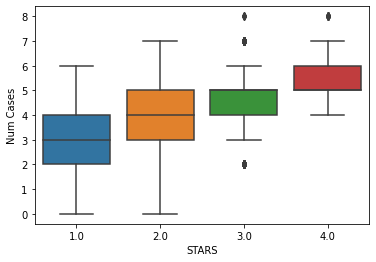

In [225]:
#doing the same as above in seaborn
sns.boxplot(y ='Num Cases', x ='STARS',data = new1_df )

Conclusion: 

These has been slight change in the graphs. Some of the graphs make more sense. However, Some has stayed the same.
